In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.5 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.1 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.0 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("data/train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Veride eksik (NaN) olan yerleri dolduracağız ya da çıkaracağız. Ayrıca kategorik (örneğin "Sex") verileri sayısal hale getireceğiz.

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [9]:
# Gereksiz sütunları çıkaralım (mesela 'Cabin', 'Ticket' çok eksik veya anlamsız olabilir)
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], inplace=True)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


In [12]:
print(df['Sex'].value_counts())
print(df[['Sex', 'Survived']].head(10))

Sex
0    577
1    314
Name: count, dtype: int64
   Sex  Survived
0    0         0
1    1         1
2    1         1
3    1         1
4    0         0
5    0         0
6    0         0
7    0         0
8    1         1
9    1         1


In [13]:
# hedef degısken olan survıed sutununu cıkarıp geri kalanını x(özellikler) yap
X = df.drop('Survived', axis=1)
y = df['Survived']


Veriyi eğitim ve test için bölelim


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Doğruluğu:", accuracy_score(y_test, y_pred))


Model Doğruluğu: 0.8100558659217877


Desicion Tree ile nasıl değişiyor

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [17]:
# Modeli oluştur
dt_model = DecisionTreeClassifier(random_state=42)

# Eğit
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = dt_model.predict(X_test)


In [19]:
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk (Accuracy): 0.7597765363128491

Karışıklık Matrisi:
 [[84 21]
 [22 52]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



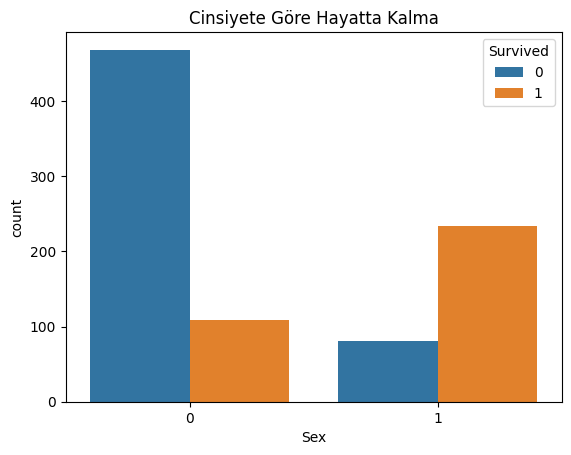

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Cinsiyete Göre Hayatta Kalma')
plt.show()
